ตารางที่ต้องใช้มีดังนี้

wp_posts , wp_tutor_quiz_attempt_answers , wp_tutor_quiz_attempts , wp_users

โดยเก็บตารางในรูปของไฟล์ .csv

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

โค้ดข้างล่างสร้างตารางเก็บผู้เรียน ในแต่ละ course

In [4]:
course_mem = pd.read_csv('table/wp_posts.csv')
course_mem = course_mem[course_mem['post_type'] == 'tutor_enrolled']
#course_mem.drop_duplicates(subset = ['course_id' , 'quiz_id' , 'user_id'], keep = 'first' ,inplace = True)
course_mem = course_mem[['post_author','post_parent','post_status']]
course_mem = course_mem[course_mem['post_status'] == 'completed']
course_mem.drop_duplicates(keep = 'first' ,inplace = True)
course_mem = course_mem[['post_author','post_parent']]
course_mem_num = course_mem['post_parent'].value_counts()
course_mem_num = course_mem_num.sort_index()
#course_mem_num

โค้ดข้างล่างสร้างตาราง quiz_student เก็บผู้เรียนที่ส่ง quiz

quiz_num เก็บจำนวนผู้เรียนที่ส่งของแต่ละ quiz

In [5]:
quiz_student = pd.read_csv('table/wp_tutor_quiz_attempt_answers.csv')
quiz_student = quiz_student[['quiz_id','user_id']]
quiz_student.drop_duplicates(inplace = True)
quiz_student.sort_values("quiz_id", inplace = True)
quiz_student = quiz_student.reset_index(drop = True)
#print(quiz_student)
quiz_num = quiz_student['quiz_id'].value_counts()
quiz_num = quiz_num.sort_index()
#print(quiz_num)

โค้ดข้างล่างสร้างตาราง first_attempt เก็บการส่ง quiz ครั้งแรกของแต่ละผู้เรียนในแต่ละ quiz

user เก็บ ID และ ชื่อที่แสดงของผู้เรียน

In [6]:
first_attempt = pd.read_csv('table/wp_tutor_quiz_attempts.csv')
first_attempt.drop_duplicates(subset = ['course_id' , 'quiz_id' , 'user_id'], keep = 'first' ,inplace = True)
user = pd.read_csv('table/wp_users.csv')
user = user[['ID','display_name']]
#user

โค้ดข้างล่างสร้างตาราง course_quiz เก็บรายชื่อ quiz ของแต่ละ course

In [7]:
course_quiz = first_attempt.copy()
course_quiz = course_quiz[['course_id' , 'quiz_id']]
course_quiz.drop_duplicates( keep = 'first' ,inplace = True)
#course_quiz

โค้ดข้างล่างจะทำการสร้างกราฟคะแนนของ quiz ที่เลือก โดยใส่ quiz_id ในตัวแปร select_quiz บรรทัดแรก

โดยจะแสดงจำนวนผู้เรียนที่สง quiz จากผู้เรียนทั้งหมดในคอร์ส คะแนนเต็ม คะแนนเฉลี่ย เปอร์เซ็นต์ไทล์ที่ 25 50 และ 75 ผู้เรียนที่ส่งงานคนแรกและคนล่าสุด

**แสดงเฉพาะคะแนนการส่งคำตอบครั้งแรกของแต่ละ quiz เท่านั้น

summited student = 21 / 140
max = 18.0
mean = 15.95
percentile 25 = 15.0
percentile 50 = 18.0
percentile 75 = 18.0
first attempted by Kard Sahaphong at 2020-05-08 07:04:18
last attempted by natchapol at 2020-06-20 02:24:18


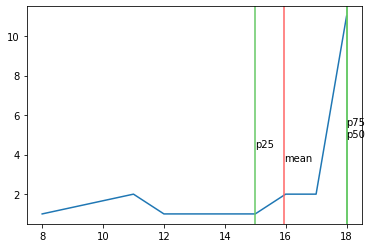

In [8]:
select_quiz = 9854
quiz_table = first_attempt[first_attempt['quiz_id'] ==select_quiz ]
quiz_table = quiz_table.reset_index(drop = True)
quiz_table = quiz_table[['attempt_id' , 'user_id' , 'total_marks' , 'earned_marks' , 'attempt_ended_at']]
quiz_table = quiz_table.dropna()
#print(quiz_table)
a = list(quiz_table['earned_marks'])
max_s = course_mem_num[course_quiz[course_quiz['quiz_id'] == select_quiz].iloc[0]['course_id']]
print('summited student = ' + str(len(a)) + ' / ' + str(max_s))
max = quiz_table['total_marks'].max()
print('max = '+str(max))
mean = round(sum(a) / len(a),2)
print('mean = ' + str(mean))
b25 = np.percentile(a,25)
b50 = np.percentile(a,50)
b75 = np.percentile(a,75)
print('percentile 25 = '+str(b25))
print('percentile 50 = '+str(b50))
print('percentile 75 = '+str(b75))
print('first attempted by ' + user[user['ID'] == quiz_table.iloc[0]['user_id']].iloc[0]['display_name'] + ' at '+str(quiz_table.iloc[0]['attempt_ended_at']))
print('last attempted by ' + user[user['ID'] == quiz_table.iloc[-1]['user_id']].iloc[0]['display_name'] + ' at '+str(quiz_table.iloc[-1]['attempt_ended_at']))
vc = quiz_table['earned_marks'].value_counts()
vc = vc.sort_index()
#print(vc)
plt.plot(vc)
plt.axvline(mean, ymin = 0 , ymax = 1 , c=(255/255, 100/255, 100/255), alpha=1)
plt.text(mean, vc.max() / 3, 'mean')
plt.axvline(b50, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b50, vc.max() / 2.25, 'p50')
plt.axvline(b25, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b25, vc.max() / 2.5, 'p25')
plt.axvline(b75, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
plt.text(b75, vc.max() / 2, 'p75')
plt.show()

โค้ดข้างล่างจะทำการสร้างกราฟคะแนนของแต่ละ quiz ใน course ที่เลือก โดยใส่ course_id ในตัวแปร course บรรทัดแรก

โดยจะแสดงจำนวนผู้เรียนทั้งหมดใน course และแสดงผลของ quiz แต่ละตัวในคอร์ส โดยจะบอกคะแนนเต็ม และจำนวนผู้เรียนที่ส่ง quiz นั้นๆต่อผู้เรียนทั้งหมดในคอร์ส

**แสดงเฉพาะคะแนนการส่งคำตอบครั้งแรกของแต่ละ quiz เท่านั้น

course id : 7313
total student = 140
quiz no.9561
summited student = 29 / 140
max score = 24.0
-------------------------------------------------------------------
quiz no.9628
summited student = 23 / 140
max score = 55.0
-------------------------------------------------------------------
quiz no.9882
summited student = 23 / 140
max score = 9.0
-------------------------------------------------------------------
quiz no.9872
summited student = 22 / 140
max score = 5.0
-------------------------------------------------------------------
quiz no.9887
summited student = 21 / 140
max score = 5.0
-------------------------------------------------------------------
quiz no.9885
summited student = 22 / 140
max score = 14.0
-------------------------------------------------------------------
quiz no.9888
summited student = 19 / 140
max score = 6.0
-------------------------------------------------------------------
quiz no.9890
summited student = 19 / 140
max score = 5.0
----------------------------

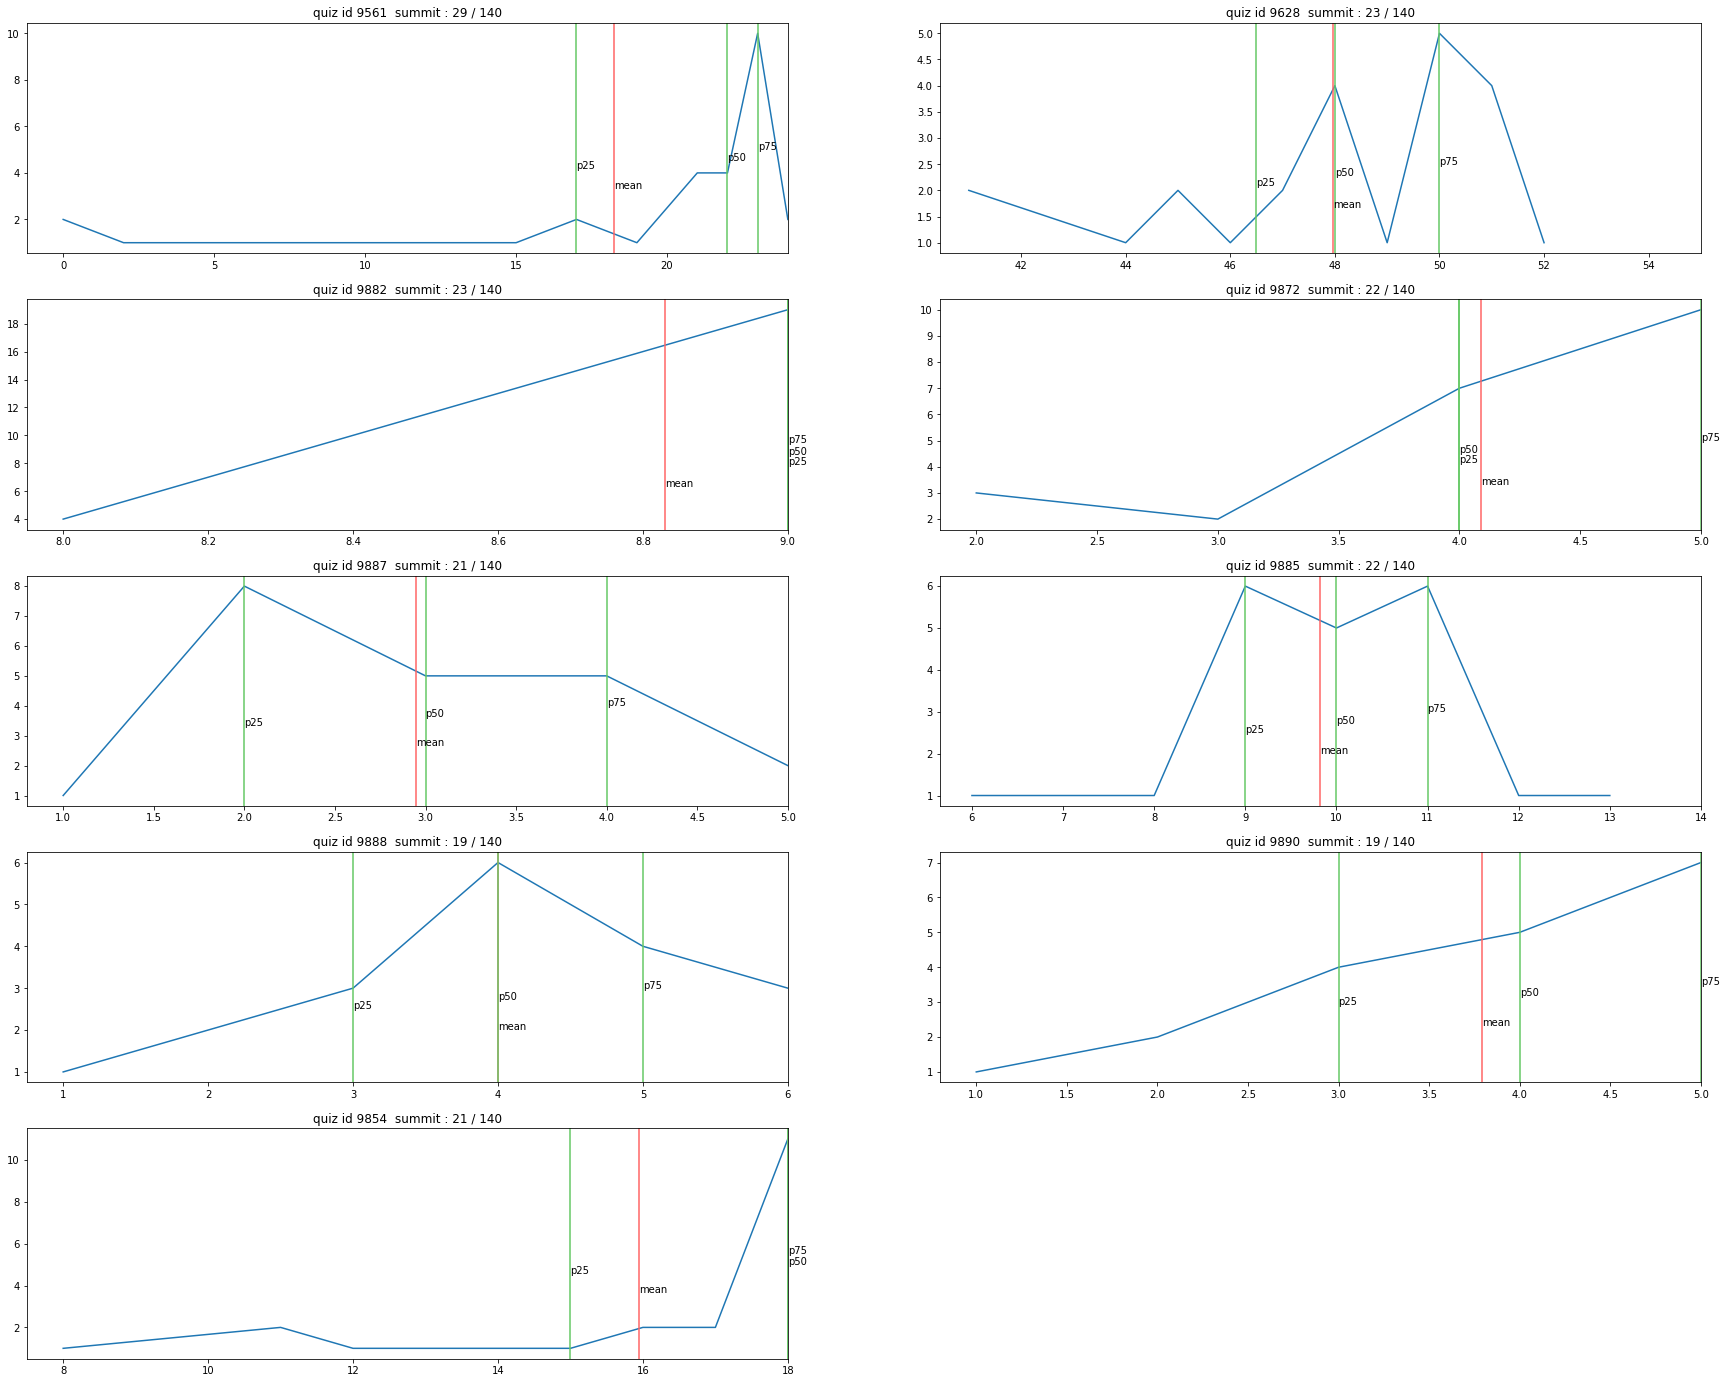

In [9]:
course = 7313
fig = plt.figure(figsize=(30, 50))
c_list = list(course_quiz[course_quiz['course_id'] == 7313]['quiz_id'])
print('course id : '+str(course))
max_s = course_mem_num[course]
print('total student = ' + str(course_mem_num[course]))
n= 1
for i in range (0,len(c_list)):
    ax = fig.add_subplot(10,2,i+1)
    
    select_quiz = c_list[i]
    quiz_table = first_attempt[first_attempt['quiz_id'] ==select_quiz ]
    quiz_table = quiz_table.reset_index(drop = True)
    quiz_table = quiz_table[['attempt_id' , 'user_id' , 'total_marks' , 'earned_marks' , 'attempt_ended_at']]
    quiz_table = quiz_table.dropna()
    print('quiz no.'+str(c_list[i]))
    a = list(quiz_table['earned_marks'])
    print('summited student = ' + str(len(a)) + ' / ' + str(max_s))
    m = quiz_table['total_marks'].max()
    print('max score = '+str(m))
    mean = round(sum(a) / len(a),2)
    b25 = np.percentile(a,25)
    b50 = np.percentile(a,50)
    b75 = np.percentile(a,75)
    
    vc = quiz_table.copy()['earned_marks'].value_counts()
        
    vc = vc.sort_index()
    ax.plot(vc)
    ax.axvline(mean, ymin = 0 , ymax = 1 , c=(255/255, 100/255, 100/255), alpha=1)
    ax.text(mean, vc.max() / 3, 'mean')
    ax.axvline(b50, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b50, vc.max() / 2.2, 'p50')
    ax.axvline(b25, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b25, vc.max() / 2.4, 'p25')
    ax.axvline(b75, ymin = 0 , ymax = 1 , c=(100/255, 200/255, 100/255), alpha=1)
    ax.text(b75, vc.max() / 2, 'p75')
    ax.set_xlim(right = m)
    ax.set_title('quiz id ' +str(c_list[i]) + '  summit : ' + str(len(a)) + ' / ' + str(max_s))
    print('-------------------------------------------------------------------')
plt.show()